In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the Excel file
file_path = '../data/patient_data.csv'
df = pd.read_csv(file_path, delimiter=';')

In [3]:
df.head()

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842,BMI,CardiovascularDisease
0,0,0,0,0,0,0,28.607859,0
1,0,0,1,1,0,0,26.651948,0
2,1,1,1,0,0,1,31.885502,0
3,0,0,1,0,0,0,29.353686,0
4,1,1,0,0,0,0,33.630251,0


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('CardiovascularDisease', axis=1)
y = df.CardiovascularDisease
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

/home/selun/Dokumente/Sync_Office/00_git/machine-learning-cheatsheet/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


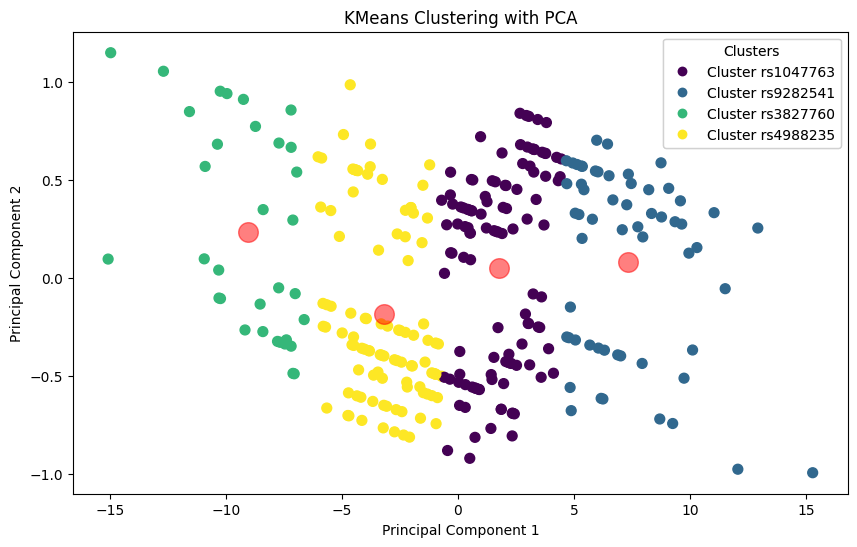

In [9]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the data points and the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids in the reduced space

centers_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', s=200, alpha=0.5)

# Adding a legend
handles, labels = scatter.legend_elements(prop="colors")
legend1 = plt.legend(handles, [f'Cluster {i}' for i in kmeans.feature_names_in_], title="Clusters")
plt.gca().add_artist(legend1)

plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()